<a href="https://colab.research.google.com/github/tongnet/fin7047_2026spr/blob/main/lec3_mstr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Get MSTR price data and calculate

import pandas as pd
import yfinance as yf

mstr_data = yf.download('MSTR', start='2015-09-20', end='2025-12-31')
mstr_data = mstr_data.reset_index().rename(columns={'index': 'Date'})

mstr_data['Daily Return'] = mstr_data['Close'].pct_change()

filepath = "mstr_daily_returns.csv"

mstr_data.to_csv(filepath, index=False) # Save without the DataFrame index

print(f"Data with daily returns saved to: {filepath}")
first5=mstr_data.head()
last5=mstr_data.tail()
print(first5)
print(last5)

/tmp/ipython-input-1656516139.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  mstr_data = yf.download('MSTR', start='2015-09-20', end='2025-12-31')
[*********************100%***********************]  1 of 1 completed

Data with daily returns saved to: mstr_daily_returns.csv
Price        Date      Close       High        Low       Open   Volume  \
Ticker                  MSTR       MSTR       MSTR       MSTR     MSTR   
0      2015-09-21  20.850000  21.103001  20.638000  20.801001   936000   
1      2015-09-22  20.707001  20.841000  20.559999  20.691000   821000   
2      2015-09-23  20.827999  20.885000  20.659000  20.788000   624000   
3      2015-09-24  20.518999  20.910000  20.389999  20.698999  1297000   
4      2015-09-25  20.518999  21.458000  20.344999  20.731001  1251000   

Price  Daily Return  
Ticker               
0               NaN  
1         -0.006858  
2          0.005843  
3         -0.014836  
4          0.000000  
Price        Date       Close        High         Low        Open    Volume  \
Ticker                   MSTR        MSTR        MSTR        MSTR      MSTR   
2580   2025-12-23  157.880005  162.729996  156.500000  162.250000  15891200   
2581   2025-12-24  158.710007  15

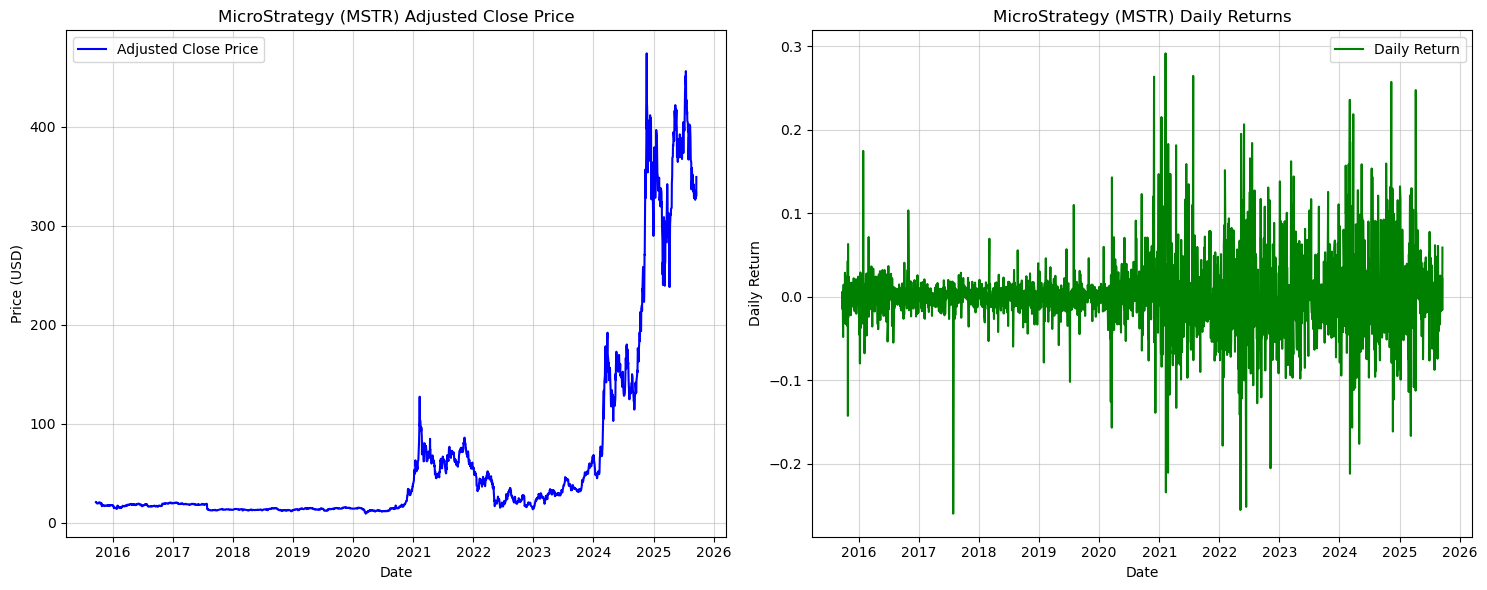

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved data
filepath = "mstr_daily_returns.csv"
mstr_data = pd.read_csv(filepath, parse_dates=['Date'])

# Ensure Date is the index
mstr_data.set_index('Date', inplace=True)

# Convert columns to numeric to avoid errors
mstr_data['Close'] = pd.to_numeric(mstr_data['Close'], errors='coerce')
mstr_data['Daily Return'] = pd.to_numeric(mstr_data['Daily Return'], errors='coerce')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

# Convert index to NumPy array before plotting
axes[0].plot(mstr_data.index.to_numpy(), mstr_data['Close'].to_numpy(), label='Adjusted Close Price', color='blue')
axes[0].set_title("MicroStrategy (MSTR) Adjusted Close Price")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price (USD)")
axes[0].grid(alpha=0.5)
axes[0].legend()

axes[1].plot(mstr_data.index.to_numpy(), mstr_data['Daily Return'].to_numpy(), label='Daily Return', color='green')
axes[1].set_title("MicroStrategy (MSTR) Daily Returns")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Daily Return")
axes[1].grid(alpha=0.5)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
# Install if needed (run once)
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt

# Download MSTR data
mstr_data = yf.download(
    "MSTR",
    start="2020-01-01",
    end="2026-01-15",
    auto_adjust=False   # keep Adj Close column
)

price_2020 = mstr_data.loc["2020-01-02", "Adj Close"]   # first trading day
price_2025 = mstr_data.loc["2025-12-31", "Adj Close"]

print("MSTR Adjusted Close:")
print("2020-01-02:", round(price_2020, 2))
print("2025-12-31:", round(price_2025, 2))

[*********************100%***********************]  1 of 1 completed

MSTR Adjusted Close:
2020-01-02: Ticker
MSTR    14.43
Name: 2020-01-02 00:00:00, dtype: float64
2025-12-31: Ticker
MSTR    151.95
Name: 2025-12-31 00:00:00, dtype: float64
